In [1]:
%matplotlib inline


# Data structures

Introduction to basic data structures handling.

## Introduction

This is a getting started tutorial for Gammapy.

In this tutorial we will use the [Third Fermi-LAT Catalog of
High-Energy Sources (3FHL)
catalog](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/3FHL/)_,
corresponding event list and images to learn how to work with some of
the central Gammapy data structures.

We will cover the following topics:

-  **Sky maps**

   -  We will learn how to handle image based data with gammapy using a
      Fermi-LAT 3FHL example image. We will work with the following
      classes:

      -  `~gammapy.maps.WcsNDMap`
      -  `~astropy.coordinates.SkyCoord`
      -  `~numpy.ndarray`

-  **Event lists**

   -  We will learn how to handle event lists with Gammapy. Important
      for this are the following classes:

      -  `~gammapy.data.EventList`
      -  `~astropy.table.Table`

-  **Source catalogs**

   -  We will show how to load source catalogs with Gammapy and explore
      the data using the following classes:

      -  `~gammapy.catalog.SourceCatalog`, specifically
         `~gammapy.catalog.SourceCatalog3FHL`
      -  `~astropy.table.Table`

-  **Spectral models and flux points**

   -  We will pick an example source and show how to plot its spectral
      model and flux points. For this we will use the following classes:

      -  `~gammapy.modeling.models.SpectralModel`, specifically the
         `~gammapy.modeling.models.PowerLaw2SpectralModel`
      -  `~gammapy.estimators.FluxPoints`
      -  `~astropy.table.Table`


## Setup

**Important**: to run this tutorial the environment variable
``GAMMAPY_DATA`` must be defined and point to the directory on your
machine where the datasets needed are placed. To check whether your
setup is correct you can execute the following cell:




In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

## Check setup



In [3]:
from gammapy.utils.check import check_tutorials_setup

# %matplotlib inline


check_tutorials_setup()


System:

	python_executable      : /home/bornagain/miniconda3/envs/gammapy-1.0/bin/python 
	python_version         : 3.9.14     
	machine                : x86_64     
	system                 : Linux      


Gammapy package:

	version                : 1.0        
	path                   : /home/bornagain/miniconda3/envs/gammapy-1.0/lib/python3.9/site-packages/gammapy 


Other packages:

	numpy                  : 1.23.5     
	scipy                  : 1.9.1      
	astropy                : 5.1.1      
	regions                : 0.6        
	click                  : 8.1.3      
	yaml                   : 6.0        
	IPython                : 8.4.0      
	jupyterlab             : 3.4.8      
	matplotlib             : 3.6.2      
	pandas                 : 1.5.0      
	healpy                 : 1.16.1     
	iminuit                : 2.17.0     
	sherpa                 : 4.15.0     
	naima                  : 0.10.0     
	emcee                  : 3.1.3      
	corner                 : 2.2.1      




## Maps

The `~gammapy.maps` package contains classes to work with sky images
and cubes.

In this section, we will use a simple 2D sky image and will learn how
to:

-  Read sky images from FITS files
-  Smooth images
-  Plot images
-  Cutout parts from images




In [4]:
from gammapy.maps import Map

gc_3fhl = Map.read("$GAMMAPY_DATA/fermi-3fhl-gc/fermi-3fhl-gc-counts.fits.gz")

The image is a `~gammapy.maps.WcsNDMap` object:




In [5]:
print(gc_3fhl)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat']
	shape : (400, 200)
	ndim  : 2
	unit  : 
	dtype : >i8



The shape of the image is 400 x 200 pixel and it is defined using a
cartesian projection in galactic coordinates.

The ``geom`` attribute is a `~gammapy.maps.WcsGeom` object:




In [6]:
print(gc_3fhl.geom)

WcsGeom

	axes       : ['lon', 'lat']
	shape      : (400, 200)
	ndim       : 2
	frame      : galactic
	projection : CAR
	center     : 0.0 deg, 0.0 deg
	width      : 20.0 deg x 10.0 deg
	wcs ref    : 0.0 deg, 0.0 deg



Let’s take a closer look a the ``.data`` attribute:




In [7]:
print(gc_3fhl.data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


That looks familiar! It just an *ordinary* 2 dimensional numpy array,
which means you can apply any known numpy method to it:




In [8]:
print(f"Total number of counts in the image: {gc_3fhl.data.sum():.0f}")

Total number of counts in the image: 32684


To show the image on the screen we can use the ``plot`` method. It
basically calls
[plt.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)_,
passing the ``gc_3fhl.data`` attribute but in addition handles axis with
world coordinates using
[astropy.visualization.wcsaxes](https://docs.astropy.org/en/stable/visualization/wcsaxes/)_
and defines some defaults for nicer plots (e.g. the colormap ‘afmhot’):




<WCSAxesSubplot: >

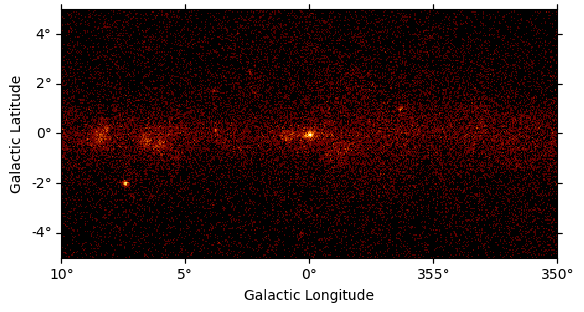

In [9]:
plt.figure()

gc_3fhl.plot(stretch="sqrt")

To make the structures in the image more visible we will smooth the data
using a Gaussian kernel.




<WCSAxesSubplot: >

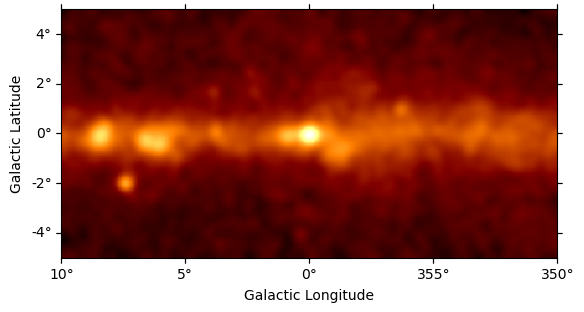

In [10]:
plt.figure()
gc_3fhl_smoothed = gc_3fhl.smooth(kernel="gauss", width=0.2 * u.deg)

gc_3fhl_smoothed.plot(stretch="sqrt")

The smoothed plot already looks much nicer, but still the image is
rather large. As we are mostly interested in the inner part of the
image, we will cut out a quadratic region of the size 9 deg x 9 deg
around Vela. Therefore we use `~gammapy.maps.Map.cutout` to make a
cutout map:




<WCSAxesSubplot: >

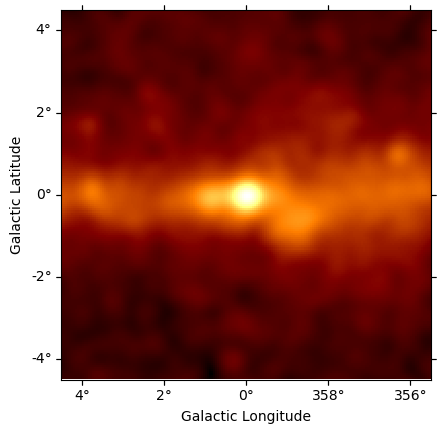

In [11]:
plt.figure()
# define center and size of the cutout region
center = SkyCoord(0, 0, unit="deg", frame="galactic")
gc_3fhl_cutout = gc_3fhl_smoothed.cutout(center, 9 * u.deg)

gc_3fhl_cutout.plot(stretch="sqrt")

For a more detailed introduction to `~gammapy.maps`, take a look a the
:doc:`/tutorials/api/maps` notebook.

### Exercises

-  Add a marker and circle at the position of ``Sgr A*`` (you can find
   examples in
   [astropy.visualization.wcsaxes](https://docs.astropy.org/en/stable/visualization/wcsaxes/)_).




## Event lists

Almost any high level gamma-ray data analysis starts with the raw
measured counts data, which is stored in event lists. In Gammapy event
lists are represented by the `~gammapy.data.EventList` class.

In this section we will learn how to:

-  Read event lists from FITS files
-  Access and work with the ``EventList`` attributes such as ``.table``
   and ``.energy``
-  Filter events lists using convenience methods

Let’s start with the import from the `~gammapy.data` submodule:




In [12]:
from gammapy.data import EventList

Very similar to the sky map class an event list can be created, by
passing a filename to the `~gammapy.data.EventList.read()` method:




In [13]:
events_3fhl = EventList.read("$GAMMAPY_DATA/fermi-3fhl-gc/fermi-3fhl-gc-events.fits.gz")

This time the actual data is stored as an
`~astropy.table.Table `
object. It can be accessed with ``.table`` attribute:




In [14]:
print(events_3fhl.table)

  ENERGY      RA       DEC          L           B         THETA      PHI     ZENITH_ANGLE ... CONVERSION_TYPE      LIVETIME      DIFRSP0 DIFRSP1 DIFRSP2 DIFRSP3 DIFRSP4
   MeV       deg       deg         deg         deg         deg       deg         deg      ...                         s                                                 
--------- --------- ---------- ----------- ------------ --------- ---------- ------------ ... --------------- ------------------ ------- ------- ------- ------- -------
12186.642 260.45935 -33.553337   353.36273    1.7538676 71.977325  125.50694     59.22307 ...               0 238.57837238907814     0.0     0.0     0.0     0.0     0.0
25496.598 261.37506 -34.395004   353.09607    0.6520652  42.49406  278.49347    41.092773 ...               1 176.16850754618645     0.0     0.0     0.0     0.0     0.0
15621.498 259.56973 -33.409416   353.05673    2.4450684  64.32412  234.22194    66.526794 ...               1  9.392075657844543     0.0     0.0     0.0   

You can do *len* over event_3fhl.table to find the total number of
events.




In [15]:
print(len(events_3fhl.table))

32843


And we can access any other attribute of the ``Table`` object as well:




In [16]:
print(events_3fhl.table.colnames)

['ENERGY', 'RA', 'DEC', 'L', 'B', 'THETA', 'PHI', 'ZENITH_ANGLE', 'EARTH_AZIMUTH_ANGLE', 'TIME', 'EVENT_ID', 'RUN_ID', 'RECON_VERSION', 'CALIB_VERSION', 'EVENT_CLASS', 'EVENT_TYPE', 'CONVERSION_TYPE', 'LIVETIME', 'DIFRSP0', 'DIFRSP1', 'DIFRSP2', 'DIFRSP3', 'DIFRSP4']


For convenience we can access the most important event parameters as
properties on the ``EventList`` objects. The attributes will return
corresponding Astropy objects to represent the data, such as
`~astropy.units.Quantity`,
`~astropy.coordinates.SkyCoord`
or
`~astropy.time.Time`
objects:




In [17]:
print(events_3fhl.energy.to("GeV"))

[12.186643 25.4966   15.621499 ... 32.095707 18.465784 14.457251] GeV


In [18]:
print(events_3fhl.galactic)
# events_3fhl.radec

<SkyCoord (Galactic): (l, b) in deg
    [(353.36228879,  1.75408483), (353.09562941,  0.6522806 ),
     (353.05628243,  2.44528685), ..., (359.10295505, -0.1359316 ),
     (359.85157506, -0.08269984), (353.71795506, -0.26883694)]>


In [19]:
print(events_3fhl.time)

[54682.82946153 54682.89243456 54682.89709472 ... 57236.75267735
 57233.37455141 57233.44802852]


In addition ``EventList`` provides convenience methods to filter the
event lists. One possible use case is to find the highest energy event
within a radius of 0.5 deg around the vela position:




In [20]:
# select all events within a radius of 0.5 deg around center
from gammapy.utils.regions import SphericalCircleSkyRegion

region = SphericalCircleSkyRegion(center, radius=0.5 * u.deg)
events_gc_3fhl = events_3fhl.select_region(region)

# sort events by energy
events_gc_3fhl.table.sort("ENERGY")

# and show highest energy photon
print("highest energy photon: ", events_gc_3fhl.energy[-1].to("GeV"))

highest energy photon:  1917.85925 GeV


### Exercises

-  Make a counts energy spectrum for the galactic center region, within
   a radius of 10 deg.




## Source catalogs

Gammapy provides a convenient interface to access and work with catalog
based data.

In this section we will learn how to:

-  Load builtins catalogs from `~gammapy.catalog`
-  Sort and index the underlying Astropy tables
-  Access data from individual sources

Let’s start with importing the 3FHL catalog object from the
`~gammapy.catalog` submodule:




In [2]:
from gammapy.catalog import CATALOG_REGISTRY
print(CATALOG_REGISTRY)

Registry
--------

SourceCatalogGammaCat: gamma-cat 
SourceCatalogHGPS    : hgps 
SourceCatalog2HWC    : 2hwc 
SourceCatalog3FGL    : 3fgl 
SourceCatalog4FGL    : 4fgl 
SourceCatalog2FHL    : 2fhl 
SourceCatalog3FHL    : 3fhl 
SourceCatalog3HWC    : 3hwc 



In [1]:
from gammapy.catalog import SourceCatalog3FHL

NameError: name 'CATALOG_REGISTRY' is not defined

First we initialize the Fermi-LAT 3FHL catalog and directly take a look
at the ``.table`` attribute:




In [22]:
fermi_3fhl = SourceCatalog3FHL()
print(fermi_3fhl.table)

   Source_Name     RAJ2000  DEJ2000    GLON     GLAT   Conf_95_SemiMajor ...           ASSOC2           ASSOC_PROB_BAY ASSOC_PROB_LR Redshift     NuPeak_obs    
                     deg      deg      deg      deg           deg        ...                                                                          Hz        
------------------ -------- -------- -------- -------- ----------------- ... -------------------------- -------------- ------------- -------- ------------------
3FHL J0001.2-0748    0.3107  -7.8075  89.0094 -67.3118            0.0424 ...                                    0.9974        0.9721       --  306196370000000.0
3FHL J0001.9-4155    0.4849 -41.9303 334.1216 -72.0697            0.1018 ...                                    0.9960        0.0000       -- 6309576500000000.0
3FHL J0002.1-6728    0.5283 -67.4825 310.0868 -48.9549            0.0357 ...                                    0.0000        0.9395       -- 4466832000000000.0
3FHL J0003.3-5248    0.8300 -52.81

This looks very familiar again. The data is just stored as an
`~astropy.table.Table`
object. We have all the methods and attributes of the ``Table`` object
available. E.g. we can sort the underlying table by ``Signif_Avg`` to
find the top 5 most significant sources:




In [23]:
# sort table by significance
fermi_3fhl.table.sort("Signif_Avg")

# invert the order to find the highest values and take the top 5
top_five_TS_3fhl = fermi_3fhl.table[::-1][:5]

# print the top five significant sources with association and source class
print(top_five_TS_3fhl[["Source_Name", "ASSOC1", "ASSOC2", "CLASS", "Signif_Avg"]])

   Source_Name               ASSOC1                     ASSOC2            CLASS  Signif_Avg
------------------ -------------------------- -------------------------- ------- ----------
3FHL J0534.5+2201  Crab Nebula                                           PWN        168.641
3FHL J1104.4+3812  Mkn 421                                               BLL        144.406
3FHL J0835.3-4510  PSR J0835-4510             Vela X field               PSR        138.801
3FHL J0633.9+1746  PSR J0633+1746                                        PSR         99.734
3FHL J1555.7+1111  PG 1553+113                                           BLL         94.411


If you are interested in the data of an individual source you can access
the information from catalog using the name of the source or any alias
source name that is defined in the catalog:




In [35]:
fermi_3fhl["Mkn 421"]

In [36]:
mkn_421_3fhl = fermi_3fhl["3FHL J1104.4+3812"]

# or use any alias source name that is defined in the catalog
mkn_421_3fhl = fermi_3fhl["Mkn 421"]
print(mkn_421_3fhl.data["Signif_Avg"])

144.40611


### Exercises

-  Try to load the Fermi-LAT 2FHL catalog and check the total number of
   sources it contains.
-  Select all the sources from the 2FHL catalog which are contained in
   the Galactic Center region. The methods
   `~gammapy.maps.WcsGeom.contains()` and
   `~gammapy.catalog.SourceCatalog.positions` might be helpful for
   this. Add markers for all these sources and try to add labels with
   the source names.
-  Try to find the source class of the object at position ra=68.6803,
   dec=9.3331




## Spectral models and flux points

In the previous section we learned how access basic data from individual
sources in the catalog. Now we will go one step further and explore the
full spectral information of sources. We will learn how to:

-  Plot spectral models
-  Compute integral and energy fluxes
-  Read and plot flux points

As a first example we will start with the Crab Nebula:




In [37]:
crab_3fhl = fermi_3fhl["Crab Nebula"]
crab_3fhl_spec = crab_3fhl.spectral_model()
print(crab_3fhl_spec)

PowerLawSpectralModel

  type      name     value         unit        error   min max frozen is_norm link
-------- --------- ---------- -------------- --------- --- --- ------ ------- ----
spectral     index 2.2202e+00                2.498e-02 nan nan  False   False     
spectral amplitude 1.7132e-10 cm-2 GeV-1 s-1 3.389e-12 nan nan  False    True     
spectral reference 2.2726e+01            GeV 0.000e+00 nan nan   True   False     


The ``crab_3fhl_spec`` is an instance of the
`~gammapy.modeling.models.PowerLaw2SpectralModel` model, with the
parameter values and errors taken from the 3FHL catalog.

Let’s plot the spectral model in the energy range between 10 GeV and
2000 GeV:




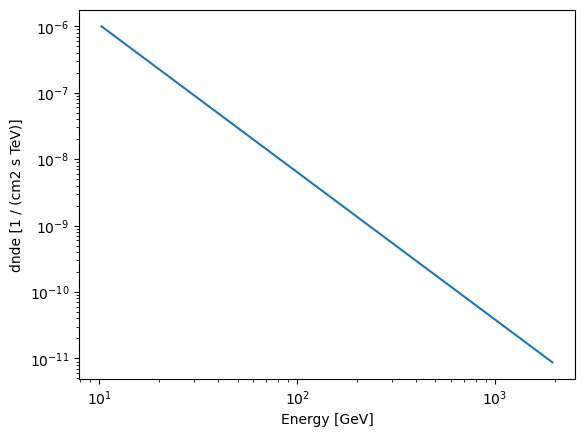

In [38]:
plt.figure()
ax_crab_3fhl = crab_3fhl_spec.plot(energy_bounds=[10, 2000] * u.GeV, energy_power=0)

We assign the return axes object to variable called ``ax_crab_3fhl``,
because we will re-use it later to plot the flux points on top.

To compute the differential flux at 100 GeV we can simply call the model
like normal Python function and convert to the desired units:




In [39]:
print(crab_3fhl_spec(100 * u.GeV).to("cm-2 s-1 GeV-1"))

6.3848912826152664e-12 1 / (cm2 GeV s)


Next we can compute the integral flux of the Crab between 10 GeV and
2000 GeV:




In [40]:
print(
    crab_3fhl_spec.integral(energy_min=10 * u.GeV, energy_max=2000 * u.GeV).to(
        "cm-2 s-1"
    )
)

8.67457342435522e-09 1 / (cm2 s)


We can easily convince ourself, that it corresponds to the value given
in the Fermi-LAT 3FHL catalog:




In [41]:
print(crab_3fhl.data["Flux"])

8.658909145253801e-09 1 / (cm2 s)


In addition we can compute the energy flux between 10 GeV and 2000 GeV:




In [42]:
print(
    crab_3fhl_spec.energy_flux(energy_min=10 * u.GeV, energy_max=2000 * u.GeV).to(
        "erg cm-2 s-1"
    )
)

5.311489174710791e-10 erg / (cm2 s)


Next we will access the flux points data of the Crab:




In [43]:
print(crab_3fhl.flux_points)

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 5)
  quantities             : ['norm', 'norm_errp', 'norm_errn', 'norm_ul', 'sqrt_ts', 'is_ul']
  ref. model             : pl
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 1
  sed type init          : flux



If you want to learn more about the different flux point formats you can
read the specification
[here](https://gamma-astro-data-formats.readthedocs.io/en/latest/spectra/flux_points/index.html)_.

No we can check again the underlying astropy data structure by accessing
the ``.table`` attribute:




In [32]:
print(crab_3fhl.flux_points.to_table(sed_type="dnde", formatted=True))

 e_ref    e_min   e_max         dnde         dnde_errp       dnde_errn        dnde_ul     sqrt_ts is_ul
  GeV      GeV     GeV    1 / (cm2 GeV s) 1 / (cm2 GeV s) 1 / (cm2 GeV s) 1 / (cm2 GeV s)              
-------- ------- -------- --------------- --------------- --------------- --------------- ------- -----
  14.142  10.000   20.000       5.120e-10       1.321e-11       1.321e-11             nan 125.157 False
  31.623  20.000   50.000       7.359e-11       2.842e-12       2.842e-12             nan  88.715 False
  86.603  50.000  150.000       9.024e-12       5.367e-13       5.367e-13             nan  59.087 False
 273.861 150.000  500.000       7.660e-13       8.707e-14       8.097e-14             nan  33.076 False
1000.000 500.000 2000.000       4.291e-14       1.086e-14       9.393e-15             nan  15.573 False


Finally let’s combine spectral model and flux points in a single plot
and scale with ``energy_power=2`` to obtain the spectral energy
distribution:




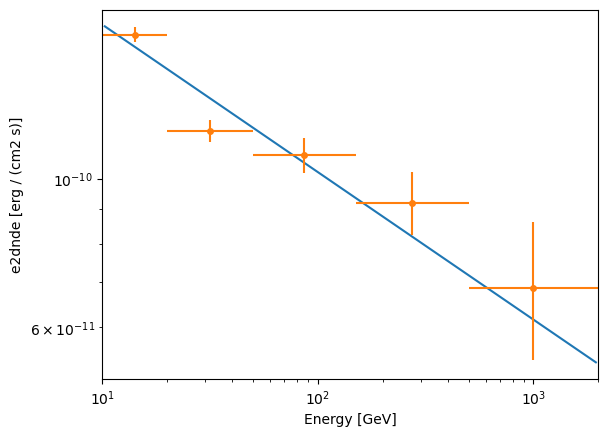

In [33]:
plt.figure()
ax = crab_3fhl_spec.plot(energy_bounds=[10, 2000] * u.GeV, sed_type="e2dnde")
crab_3fhl.flux_points.plot(ax=ax, sed_type="e2dnde")

plt.show()

### Exercises

-  Plot the spectral model and flux points for PKS 2155-304 for the 3FGL
   and 2FHL catalogs. Try to plot the error of the model (aka
   “Butterfly”) as well.



## What next?

This was a quick introduction to some of the high level classes in
Astropy and Gammapy.

-  To learn more about those classes, go to the API docs (links are in
   the introduction at the top).
-  To learn more about other parts of Gammapy (e.g. Fermi-LAT and TeV
   data analysis), check out the other tutorial notebooks.
-  To see what’s available in Gammapy, browse the Gammapy docs or use
   the full-text search.
-  If you have any questions, ask on the mailing list.


